# Linear Models - Regression

##  [Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)

In [1]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = datasets.load_linnerud()

In [3]:
print(type(data))
print(data.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['target', 'DESCR', 'data_filename', 'data', 'feature_names', 'target_names', 'target_filename'])


In [4]:
print(type(data.target))
print(type(data.DESCR))
print(type(data.data_filename))
print(type(data.data))
print(type(data.feature_names))
print(type(data.target_names))
print(type(data.target_filename))

<class 'numpy.ndarray'>
<class 'str'>
<class 'str'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>
<class 'str'>


In [5]:
print(data.target)
print(data.DESCR)
print(data.data_filename)
print(data.data)
print(data.feature_names)
print(data.target_names)
print(data.target_filename)

[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]
.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *physiological* - CSV containing 20 observations on 3 exercise variables:
   Weight, Waist and Pulse.

- *exercise* - CSV containing 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.

/usr/local/lib/python3.5/dist-packages/sklearn/datasets/data/linnerud_exerci

In [127]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target[:, 0]
#df['target0'] = data.target[:, 0]
#df['target1'] = data.target[:, 1]
#df['target2'] = data.target[:, 2]

In [128]:
df.head()

,Chins,Situps,Jumps,target0,target1,target2
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


In [129]:
df.tail()

,Chins,Situps,Jumps,target0,target1,target2
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [130]:
df.describe()

,Chins,Situps,Jumps,target0,target1,target2
count,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000
mean,9.450000,145.550000,70.30000,178.600000,35.400000,56.100000
std,5.286278,62.566575,51.27747,24.690505,3.201973,7.210373
min,1.000000,50.000000,25.00000,138.000000,31.000000,46.000000
25%,4.750000,101.000000,39.50000,160.750000,33.000000,51.500000
50%,11.500000,122.500000,54.00000,176.000000,35.000000,55.000000
75%,13.250000,210.000000,85.25000,191.500000,37.000000,60.500000
max,17.000000,251.000000,250.00000,247.000000,46.000000,74.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Chins      20 non-null float64
Situps     20 non-null float64
Jumps      20 non-null float64
target0    20 non-null float64
target1    20 non-null float64
target2    20 non-null float64
dtypes: float64(6)
memory usage: 1.0 KB


In [132]:
print(df.isnull().sum())

Chins      0
Situps     0
Jumps      0
target0    0
target1    0
target2    0
dtype: int64


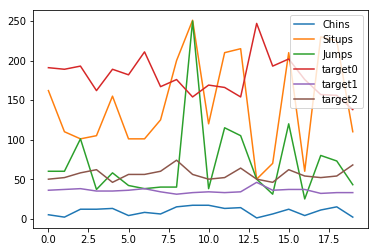

In [133]:
df.plot()

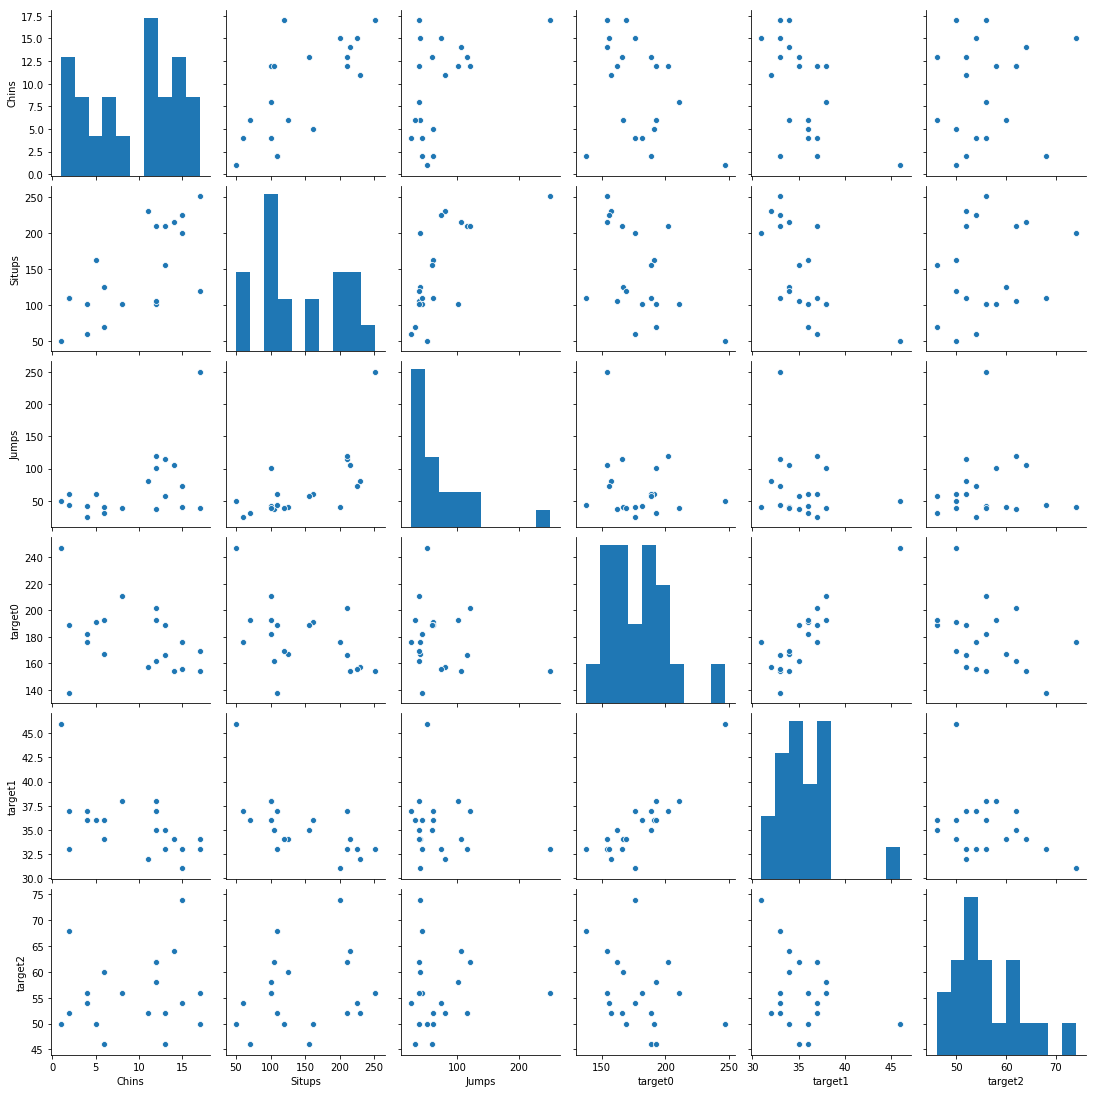

In [134]:
sns.pairplot(df)

In [135]:
X_train = data.data
y_train = data.target

In [136]:
print(X_train[:5])

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]]


In [137]:
print(y_train[:5])

[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]]


In [138]:
# y = wx + b
model = linear_model.LinearRegression()

In [139]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
print(model.coef_) # 기울기, w1, w2 ... wn

[[-0.47502636 -0.21771647  0.09308837]
 [-0.13687023 -0.04033662  0.0279736 ]
 [ 0.00107079  0.04202941 -0.02946117]]


In [141]:
print('used features: {}'.format(np.sum(model.coef_ != 0)))

used features: 9


In [142]:
print(model.score(X_train, y_train)) # 0~1

0.25725245750743886


/usr/local/lib/python3.5/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [143]:
print(model.intercept_) # 절편, b

[208.23351881  40.59787542  52.04362105]


In [144]:
df.drop(columns=['target'], inplace=True)

ValueError: labels ['target'] not contained in axis

In [24]:
X_train = np.array(df)
y_train = data.target

In [25]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(model.coef_)

[[-0.47502636 -0.21771647  0.09308837]
 [-0.13687023 -0.04033662  0.0279736 ]
 [ 0.00107079  0.04202941 -0.02946117]]


In [39]:
X_train = df[['Situps']].values
y_train = data.target[:,0]

In [40]:
print(type(X_train))

<class 'numpy.ndarray'>


In [41]:
X_train.shape

(20, 1)

In [42]:
print(X_train[-5:])

[[210.]
 [ 60.]
 [230.]
 [225.]
 [110.]]


In [43]:
print(y_train[-5:])

[202. 176. 157. 156. 138.]


In [44]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print(model.score(X_train, y_train))

0.24313148099402082


In [46]:
print(model.coef_)

[-0.19458448]


In [47]:
print(model.intercept_)

206.92177079054733


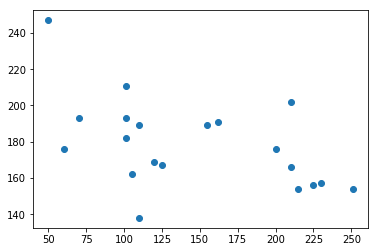

In [48]:
plt.scatter(X_train, y_train)

In [49]:
y = model.predict(X_train)

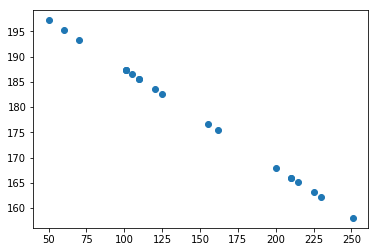

In [50]:
plt.scatter(X_train, y)

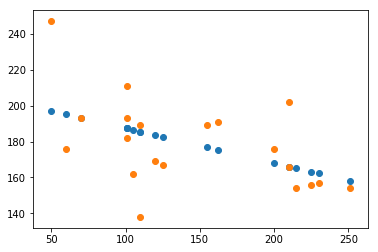

In [51]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

##  [Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification)

In [53]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [54]:
data = datasets.load_linnerud()

In [55]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [63]:
df.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [64]:
df.tail()

,Chins,Situps,Jumps
15,12.0,210.0,120.0
16,4.0,60.0,25.0
17,11.0,230.0,80.0
18,15.0,225.0,73.0
19,2.0,110.0,43.0


In [65]:
X_train = df[['Situps']].values
y_train = data.target[:,0]

In [66]:
# LInearRegression과 비슷하나 overfit이 덜 된다

model = linear_model.Ridge(alpha=0.5)

In [67]:
model.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [68]:
print(model.score(X_train, y_train))

0.24313148098303283


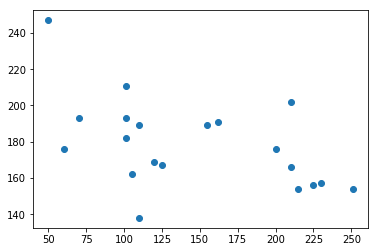

In [69]:
plt.scatter(X_train, y_train)

In [70]:
y = model.predict(X_train)

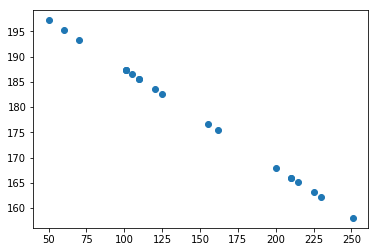

In [71]:
plt.scatter(X_train, y)

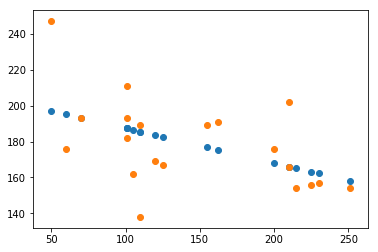

In [72]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lasso)

In [73]:
X_train = df[['Situps']].values
y_train = data.target[:,0]

In [74]:
model = linear_model.Lasso(alpha=0.1)

In [75]:
model.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
y = model.predict(X_train)

In [77]:
print(model.score(X_train, y_train))

0.24313147635092047


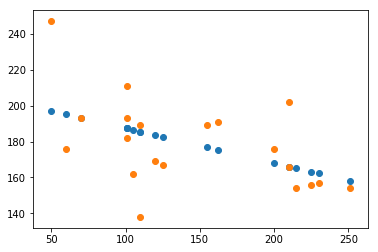

In [78]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Multi-mask Lasso](https://scikit-learn.org/stable/modules/linear_model.html#multi-task-lasso)

## [Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

In [79]:
X_train = df[['Situps']].values
y_train = data.target[:,0]

In [80]:
model = linear_model.ElasticNet()

In [81]:
model.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
y = model.predict(X_train)

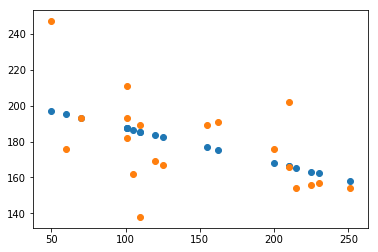

In [83]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Multi-task Elastic-Net](https://scikit-learn.org/stable/modules/linear_model.html#multi-task-elastic-net)

## [Least Angle Regression](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression)

In [84]:
X_train = df[['Situps']].as_matrix()
y_train = data.target[:,0]

In [85]:
model = linear_model.Lars(n_nonzero_coefs=1)

In [86]:
model.fit(X_train, y_train)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True, fit_path=True,
     n_nonzero_coefs=1, normalize=True, precompute='auto', verbose=False)

In [87]:
y = model.predict(X_train)

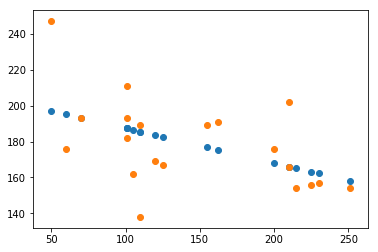

In [88]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [LARS Lasso](https://scikit-learn.org/stable/modules/linear_model.html#lars-lasso)

In [89]:
X_train = df[['Situps']].as_matrix()
y_train = data.target[:,0]

In [90]:
model = linear_model.LassoLars(alpha=0.1)

In [91]:
model.fit(X_train, y_train)

LassoLars(alpha=0.1, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

In [92]:
y = model.predict(X_train)

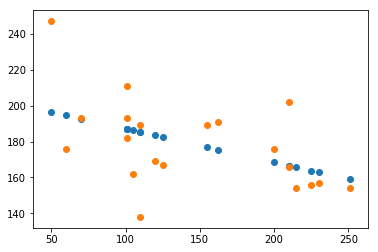

In [93]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Orthogonal Matching Pursuit](https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp)

In [94]:
X_train = df[['Situps']].as_matrix()
y_train = data.target[:,0]

In [95]:
model = linear_model.OrthogonalMatchingPursuit()

In [96]:
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=None,
                          normalize=True, precompute='auto', tol=None)

In [97]:
y = model.predict(X_train)

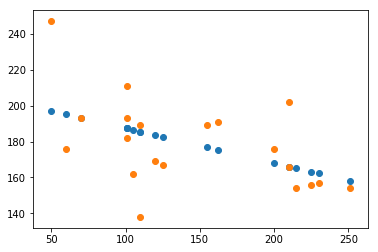

In [98]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Bayesian Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression)

In [99]:
X_train = df[['Situps']].as_matrix()
y_train = data.target[:,0]

In [100]:
model = linear_model.BayesianRidge()

In [101]:
model.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [102]:
y = model.predict(X_train)

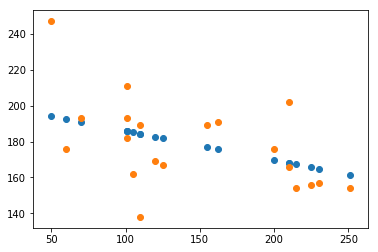

In [103]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [84]:
# need to watch the log and python code
#X_train = df[['MedInc']].as_matrix()
#y_train = data.target

In [85]:
#model = linear_model.ARDRegression()

In [86]:
#model.fit(X_train, y_train)

In [87]:
#y = model.predict(X_train)

In [88]:
#plt.scatter(X_train, y)
#plt.scatter(X_train, y_train)
#plt.show()

## [ Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd)

In [104]:
X_train = df[['Situps']].as_matrix()
y_train = data.target[:,0]

In [105]:
model = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [91]:
model.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [92]:
y = model.predict(X_train)

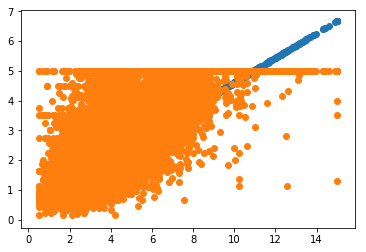

In [93]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Perceptron](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)

In [94]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [95]:
model = linear_model.PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3)

In [96]:
model.fit(X_train, y_train)

PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=100,
                           n_iter_no_change=5, random_state=0, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
y = model.predict(X_train)

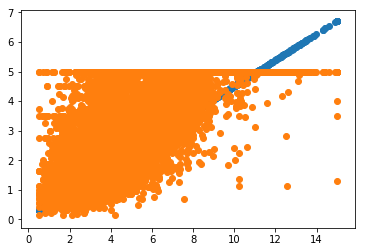

In [98]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Robustness regression](https://scikit-learn.org/stable/modules/linear_model.html#robustness-regression-outliers-and-modeling-errors)

In [99]:
X_train = df[['MedInc']].as_matrix()
y_train = data.target

In [100]:
model = linear_model.RANSACRegressor()

In [101]:
model.fit(X_train, y_train)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [102]:
y = model.predict(X_train)

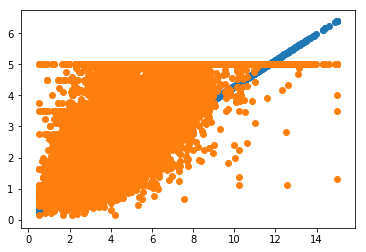

In [103]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [104]:
model = linear_model.TheilSenRegressor(random_state=42)

In [105]:
model.fit(X_train, y_train)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=42, tol=0.001, verbose=False)

In [106]:
y = model.predict(X_train)

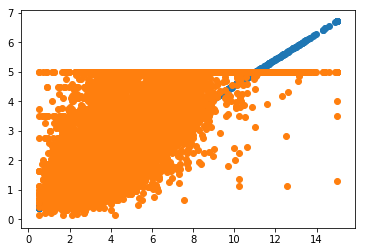

In [107]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

In [108]:
model = linear_model.HuberRegressor()

In [109]:
model.fit(X_train, y_train)

HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

In [110]:
y = model.predict(X_train)

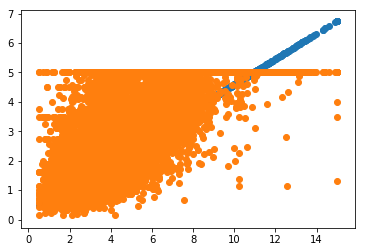

In [111]:
plt.scatter(X_train, y)
plt.scatter(X_train, y_train)
plt.show()

## [Polynomial regression](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)